<a href="https://colab.research.google.com/github/hunaynr/PCVK_Genap_2021/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**

**PRAKTIKUM FILTER**<br>

Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
from google.colab import drive

# Acessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

**Membuat Fungsi Konvolusi**<br>

Fungsi konvolusi yang dibuat memiliki parameter berupa:<br>
1. Citra masukan
2. Kernel masukan matrix untuk memfilter citra
3. Nilai stride/besarnya pergeseran untuk setiap konvolusi
4. Nilai padding yang akan ditambahkan pada citra

In [11]:
def convolution2d(image, kernel, stride, padding):

  # add padding
  image = np.pad(image, padding, mode='constant', constant_values=0)

  # pick img input width and height values including insertion pad
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  """
  Formula to find the output size using convolution:
    [W-K+2SP/S]+1
  W = input img size (width/height)
  K = kernel size
  P = padding size
  S = stride value


  """
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

**Load Original Image**

In [16]:
img = cv.imread('/content/drive/MyDrive/Image Processing/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

**Define some kernels**

In [17]:
# sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

# emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])


# left sobel edge detection
kernel_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])


# canny edge detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])


# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

# storing all kernels to arr
kernels = [kernel_sharpen, kernel_emboss, kernel_sobel, kernel_canny, gauss_kernel]
kernel_name = ['Sharpen','Emboss','Left Sobel Edge Detection','Canny Edge Detection','21x21 Gaussian Blur']


**Referring convolution function and Using each defined filter**

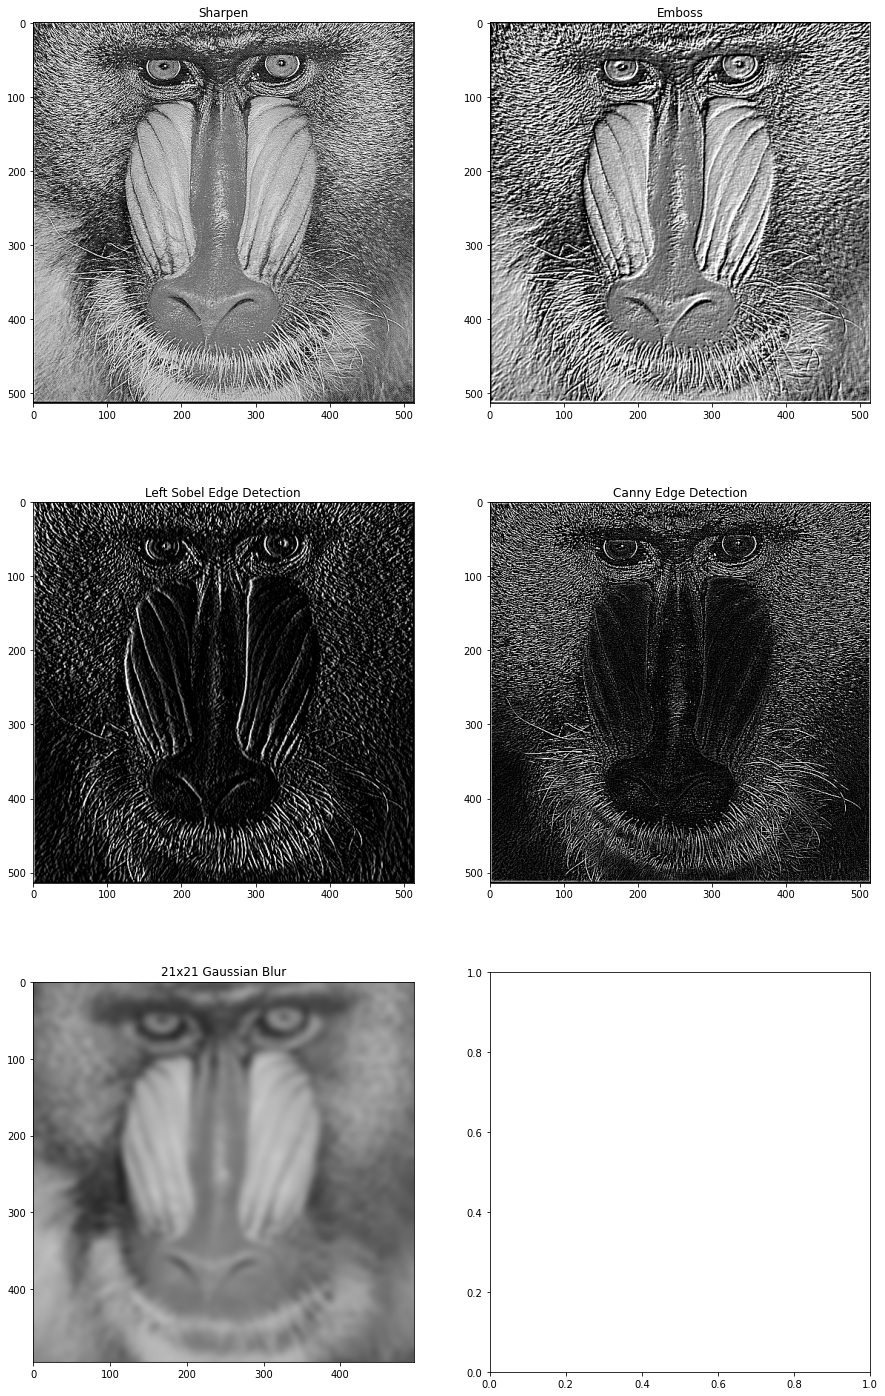

In [19]:
figure, axis = plt.subplots(3,2, figsize=(15,25))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
  conv_image=im.fromarray(convolution2d(img_gray, kernel[::-1, ::-1],1,2))
  ax.imshow(conv_image)
  ax.set_title(name)